# **Subject: Data Mining** #

Name: Nguyễn Hoàng Trung Kiên

Student's ID: 22127478

Last modified: 20/12/2024

# Lab 03: Clustering

### Self evaluation:

| Tasks | Completeness |
|----------|----------|
| Partitioning Approach: K-Means  | 100%  |
| Hierarchical Method: Agglomerative Clustering | 100%  |
| Density-Based: DBSCAN  | 100%  |

### Import dataset:

In [1]:
from sklearn.datasets import load_wine
# Load the dataset
wine = load_wine()
# Access features and target
X = wine.data
y = wine.target

### Import libraries:

In [2]:
!pip install nbformat
!pip install plotly


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Ping\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: C:\Users\Ping\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as shc 
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.io as pio

pio.renderers.default = 'notebook_connected'

## 1. Preprocessing

### Normalization by Standard Scaler

In [4]:
X_scaled = StandardScaler().fit_transform(X)

## 2. Implement clustering algorithm

### 2.1.  Partitioning Approach: K-Means

- Initialize inertia and k values

In [5]:
inertia = []
k_values = range(1, 11)

- Apply ```KMeans``` and append the ```inertia```

In [6]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

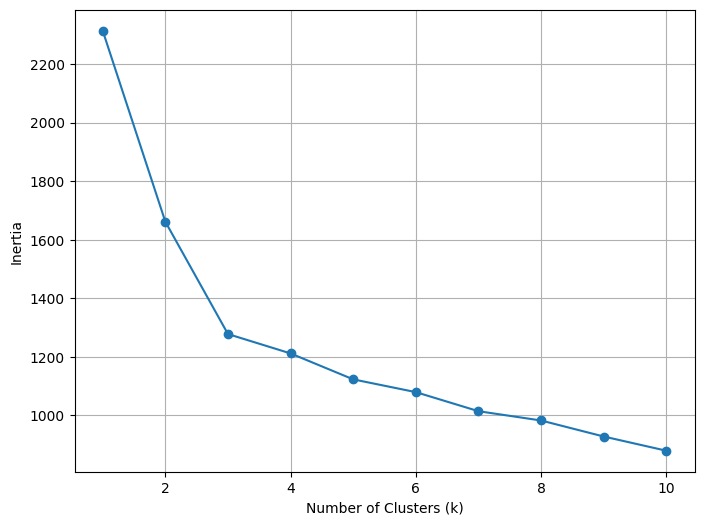

In [7]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

$\rightarrow$ From the plot above, we can observe that ```inertia``` starts decreasing at a slower rate at $k = 3$. So the optimal k value is 3.

- Clustering by ```KMeans``` using optimal $k = 3$

In [8]:
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

- Reduce dimensionality by ```PCA``` into 3 dimensions

In [9]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2', 'PCA3'])
df_pca['Cluster'] = y_kmeans

- Visualize the resulting clusters on three dimensions 

In [10]:
fig = px.scatter_3d(df_pca, x='PCA1', y='PCA2', z='PCA3', color='Cluster', title='Wine Clusters using K-Means (visualized by Plotly)')
fig.show()

### 2.2.  Hierarchical Method: Agglomerative Clustering

- Reduce dimensionality by ```PCA``` into 2 dimensions

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

- Stores different methods to compute ```linkages```

In [12]:
linkages = ['ward', 'average', 'complete', 'single']

- Visualize the resulting clusters for each linkage method

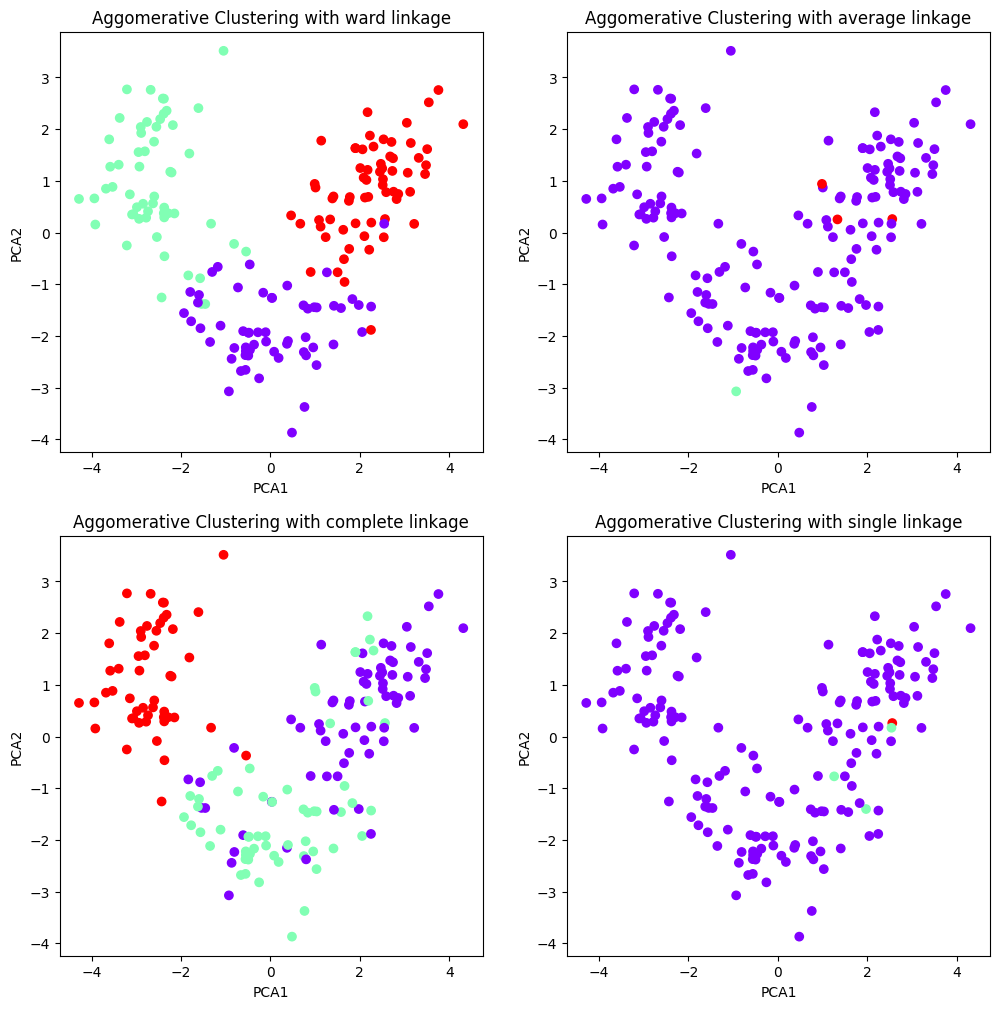

In [13]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12, 12))
ax = ax.flatten()
i = 0

for linkage in linkages:
    ax[i].scatter(X_pca[:, 0], X_pca[:, 1], c = AgglomerativeClustering(n_clusters=3, linkage=linkage).fit_predict(X_scaled), cmap='rainbow')
    ax[i].set_title(f"Aggomerative Clustering with {linkage} linkage")
    ax[i].set_xlabel('PCA1')
    ax[i].set_ylabel('PCA2')
    i += 1

### Insights

- With ```ward``` linkage, the data is clearly grouped into 3 well-separated clusters, with only a small number of points overlapping into other clusters. It is the most effective method for creating cohesive clusters.

- With ```average``` linkage, the clusters are inconsistent and more scattered, making it less effective when clusters overlap.

- With ```complete``` linkage, the result is similar to ```ward``` linkage but with slightly more overlapping data points.

- With ```single``` linkage, the clusters are not neatly separated and lack neat boundaries.

- Visualize the clustering hierarchy using ```ward linkage``` method

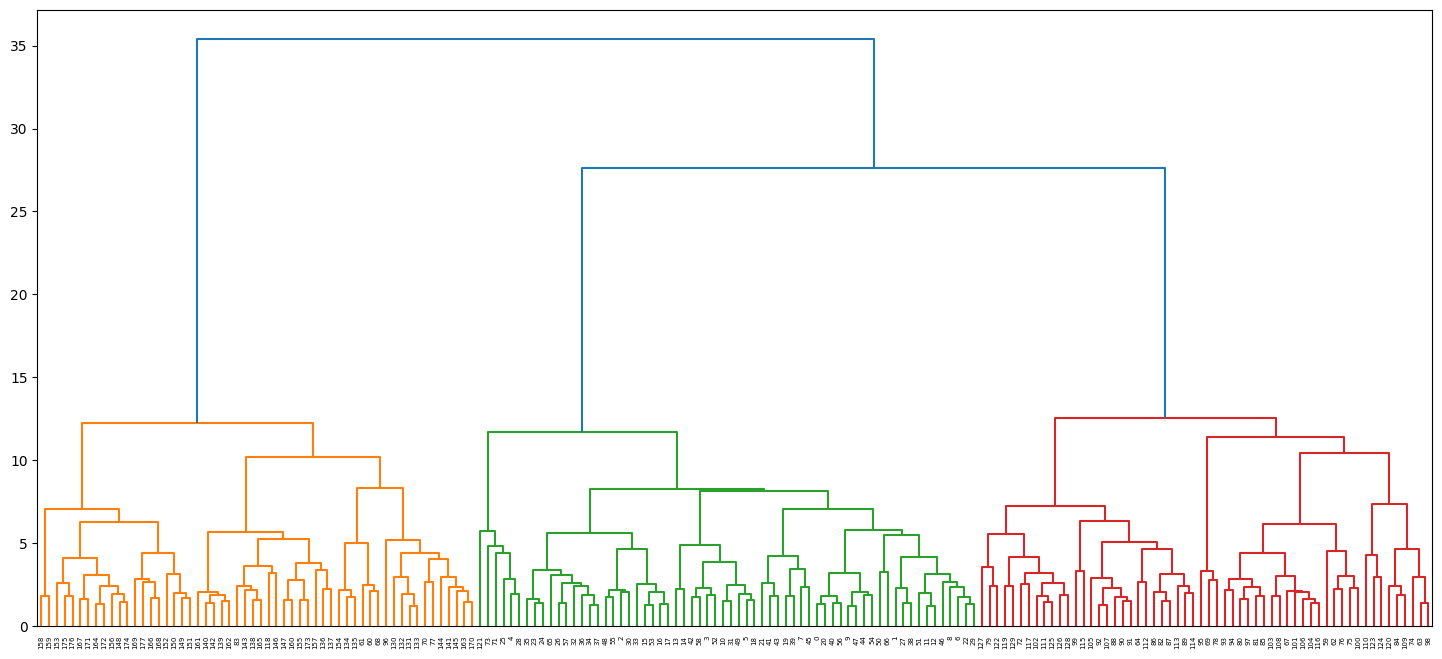

In [14]:
plt.figure(figsize =(18, 8)) 
Dendrogram = shc.dendrogram((shc.linkage(X_scaled, method ='ward'))) 

### Insights and information

- For overall insights, it is clear that if we draw a horizontal line across the Dendogram at point around 13, which is also the place that the blue vertical lines continue to separate into red, green and yellow clusters, there will be 3 vertical lines above that horizontal line, represents 3 main clusters.

- The 3 main clusters have the approximately same heights to each other.

- Within the yellow cluster, nearly 75% of its data points are grouped at high heights. There are not many branches within it merged at high distance.

- Within the green cluster, large proportion of groups are formed at lower heights. There are also some branches on the left that are merged at very high distance, representing highly dissimilar data points or outliers.

- Within the red cluster, about more than a half of data points are grouped at highest heights comparing to the sub branches of yellow and green one. But there are also branches in the middle merged at high distance, which is outlier.

### 2.3. Density-Based: DBSCAN

- Reduce dimensionality by ```PCA``` into 2 dimensions

In [15]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

- Experiment with different values for ```eps``` (the radius of the neighborhood) and ```min_samples``` (the minimum number of points required to form a cluster)

In [16]:
eps = [2, 2.25, 2.5, 2.75]
min_samples = [4, 8, 12]

- Implement ```DBSCAN``` and visualize the result

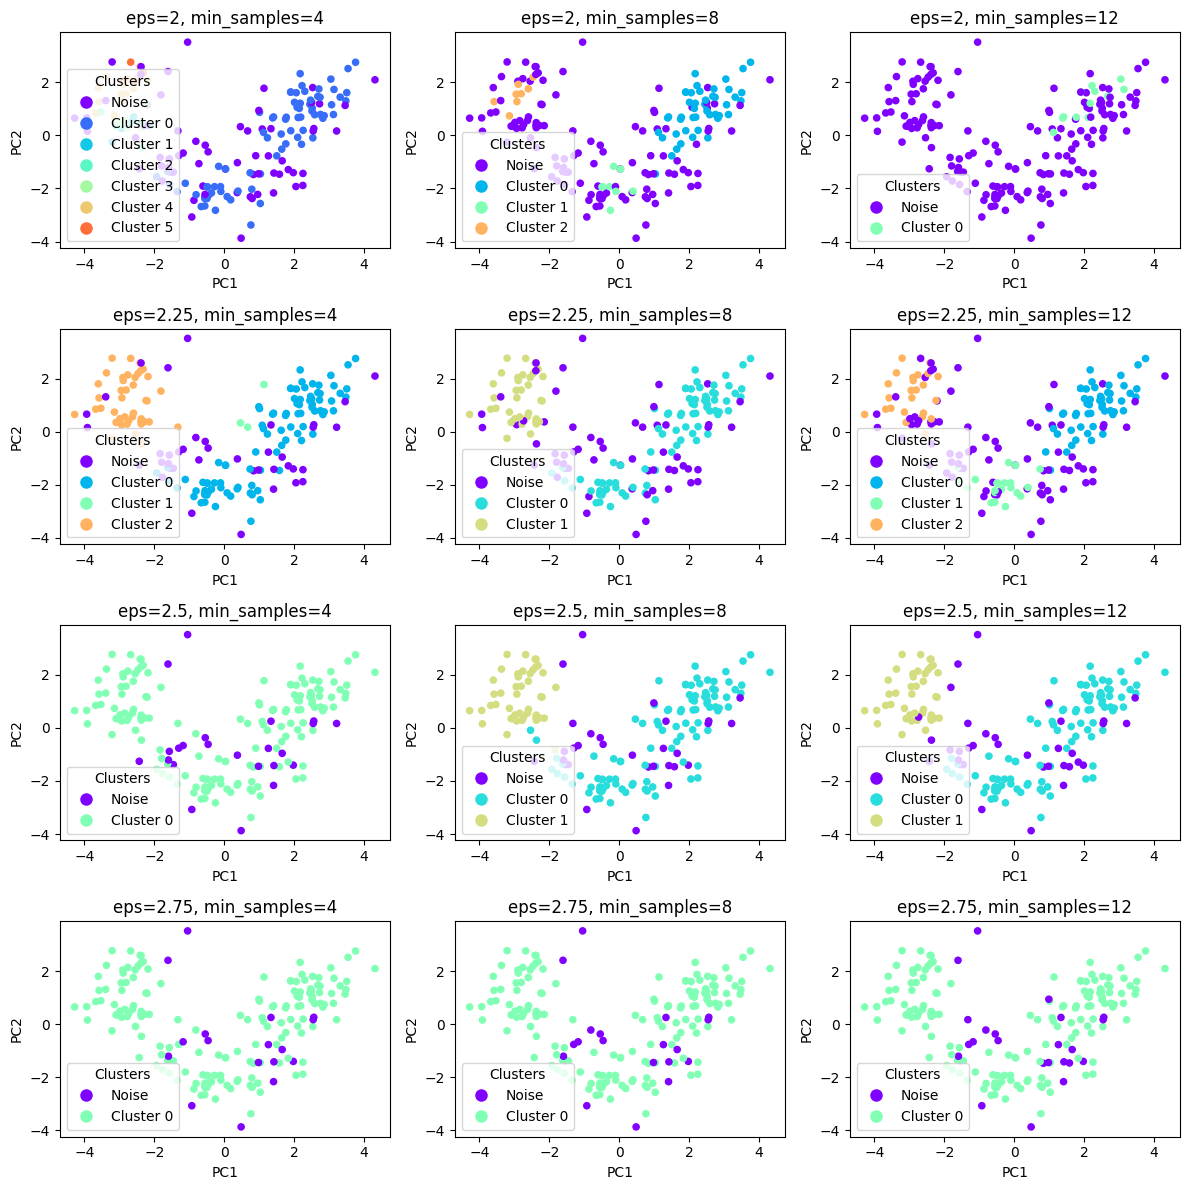

In [17]:
fig, ax = plt.subplots(nrows=len(eps), ncols=len(min_samples), figsize=(12, 12))
ax = ax.flatten()

for i, ep in enumerate(eps): 
    for j, min_sample in enumerate(min_samples):  
        labels = DBSCAN(eps=ep, min_samples=min_sample).fit_predict(X_scaled)
        unique_labels = np.unique(labels)
        
        colours = {label: plt.cm.rainbow(idx / len(unique_labels)) for idx, label in enumerate(unique_labels)}
        cvec = [colours[label] for label in labels]
        index = i * len(min_samples) + j
        ax[index].scatter(X_pca[:, 0], X_pca[:, 1], c=cvec, s=20)  
        legend_labels = [f"Cluster {label}" if label != -1 else "Noise" for label in unique_labels]
        handles = [plt.Line2D([0], [0], marker='o', color=color, linestyle='', markersize=8) for color in colours.values()]
        
        ax[index].legend(handles, legend_labels, title="Clusters", loc='lower left')
        ax[index].set_title(f"eps={ep}, min_samples={min_sample}")
        ax[index].set_xlabel('PC1')
        ax[index].set_ylabel('PC2')

plt.tight_layout()
plt.show()


### How does the change in eps and min_samples affect the density necessary to form a cluster?

- When increasing ```eps``` from 2 to 2.75, this tends to create fewer and larger clusters since the radius of the neighborhood increases and the density requirement decreases. It also reduces the number of noise points.

- When increasing ```min_samples``` from 4 to 12 means that more points are needed in a neighborhood to form a cluster. Overall, it will result in fewer clusters and more noise points.

- With low ```eps``` and low ```min_samples```, there are more small clusters formed but more noise points are created also. Comparing to those with high ```eps``` and ```min_samples```, there are less but larger clusters, noise points also occur less frequently.

- With a small ```eps``` and large ```min_samples```, only very dense regions qualify as clusters, leading to more noise and fewer clusters.

- With a large ```eps``` and small ```min_samples```, the density requirement is relaxed, potentially leading to fewer noise points and larger clusters, but with a risk of over-clustering.

## 3. References